In [1]:
import pandas as pd
import numpy as np
import collections
import networkx as nx
import matplotlib.pyplot as plt
from seaborn import color_palette, set_style, palplot

In [2]:
f=open("communities", "r")
f1 = f.readlines()

#construct community dictionary, each user -> community
community_dict = {}
communities = set()
for line in f1:
    community , ids = line.split(':')
    communities.add(community)
    ids = ids.strip('\n')
    ids = list(int(x) for x in ids.split(','))
    for id_ in ids:
        community_dict[id_] = community

print("There are in total {} communities".format(len(communities)))

There are in total 28 communities


In [3]:
f = open("list.features", "r")
f1 = f.readlines()

#construct list.feature dictionary list_id -> feature
list_map = {}

for i, feature in enumerate(f1):
    list_map[i] = feature

In [4]:

user_feature_graph = nx.Graph()


#construct a commuity graph (undirected-graph) 
f = open("lists-to-community.mtx", "r")
f1 = f.readlines()
write = open("lists-to-community.txt", 'w')
for line in f1:
    node1, node2, _ = line.split(' ')
    write.write(node1+' '+node2+'\n')
    node1, node2 = int(node1) , int(node2)
    user_feature_graph.add_edge(node1, node2)
    
#graph with community and its features

In [5]:
# plt.figure(figsize=(30,30))
# nx.drawing.nx_pylab.draw_networkx(graph, nodelist = [0,1], with_labels = False)
# plt.show()

In [6]:
def create_community_color_map(G,  attribute, seaborn_palette = 'colorblind'):
    attributes = [G.nodes[label][attribute] for label in G.nodes()]
    
    attributes_unique = list(set(attributes))
    num_values = len(attributes_unique)
    
    palette = color_palette(seaborn_palette, num_values).as_hex()
    
    color_map = dict(zip(attributes_unique, palette))
    
    node_colors = [color_map[attribute] for attribute in attributes]
    
    return node_colors, color_map, palette

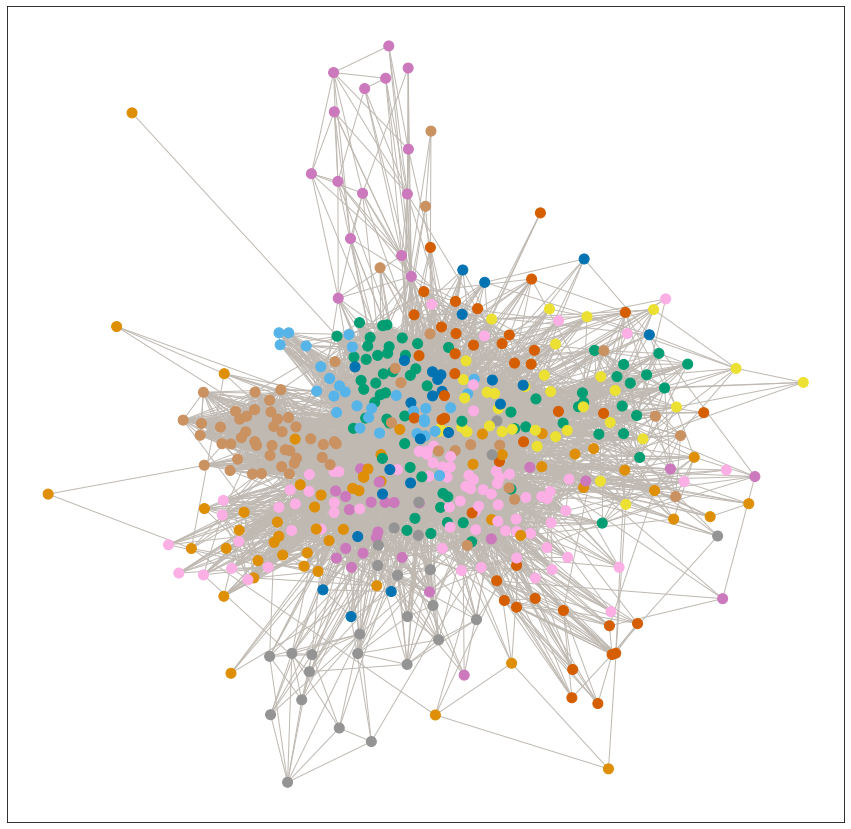

In [7]:
from networkx.drawing.nx_pydot import write_dot
f = open("followedby.mtx", "r")
f1 = f.readlines()
user_user_graph = nx.Graph()

for line in f1:
    node1, node2, _ = line.split(' ')
    node1, node2 = int(node1) , int(node2)
    user_user_graph.add_edge(node1, node2)

#community_dict = {} id -> community
nx.set_node_attributes(user_user_graph,community_dict, 'community')
node_colors, color_map, palette = create_community_color_map(user_user_graph, 'community')

#networkx drawing refer to https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,15))

#This is important to get identical positions on each graph
pos=nx.spring_layout(user_user_graph)

nx.nx_pylab.draw_networkx(user_user_graph, 
                          pos = pos,
                          arrowsize = 1,
                          with_labels = False,
                          node_size = 100,
                          node_color = node_colors,
                          edge_color = '#BFB9B2'#get the color map from here https://htmlcolorcodes.com/ !!!
                          #edge_color = '#FFFFFF'
                         )

#ax.set_facecolor("#00000F")
plt.show()


In [8]:
# fiil in the eigenvector centrality
centrality = nx.eigenvector_centrality(user_user_graph)
f = open("./centrality/eigenvector.txt","w")

for node, val in centrality.items():
    f.write(str(node) + ' '+ str(val) + '\n')
f.close()

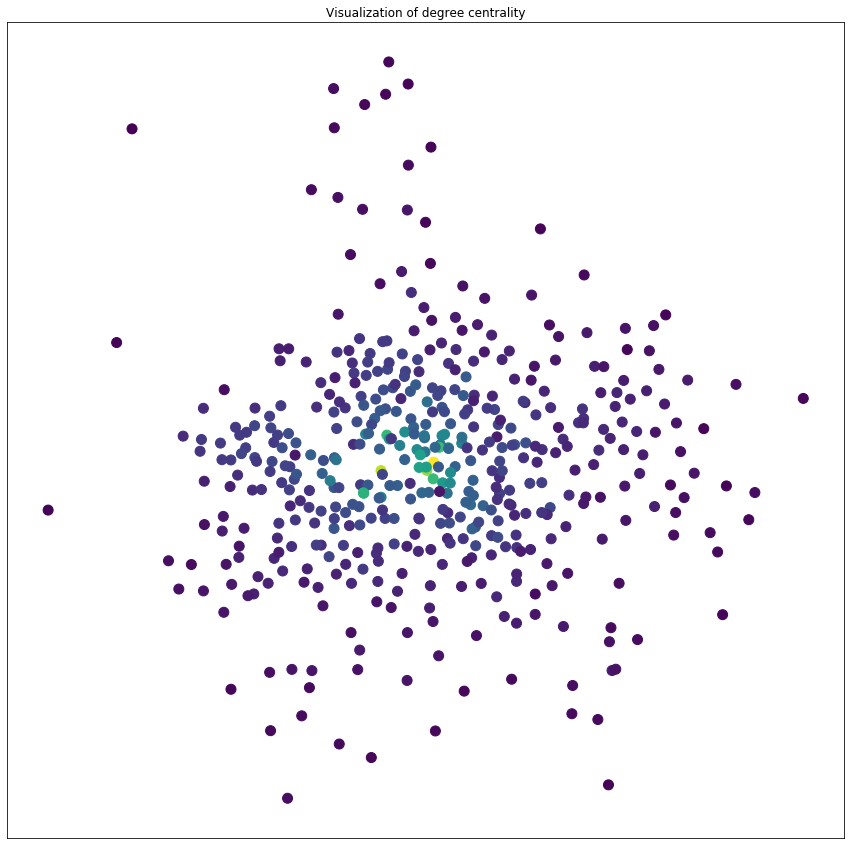

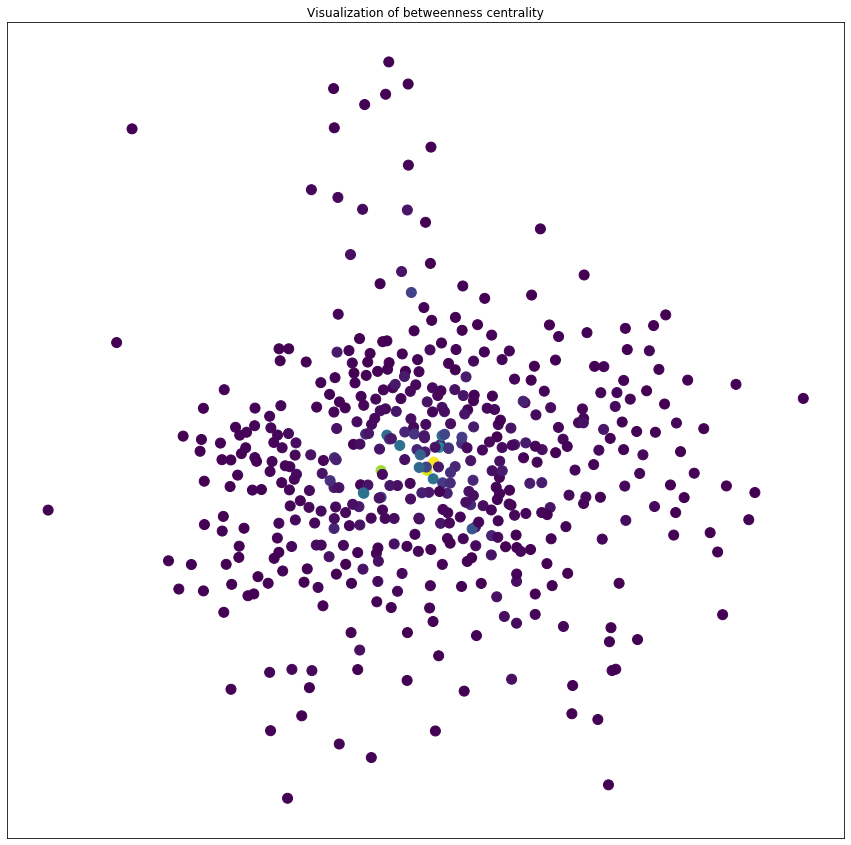

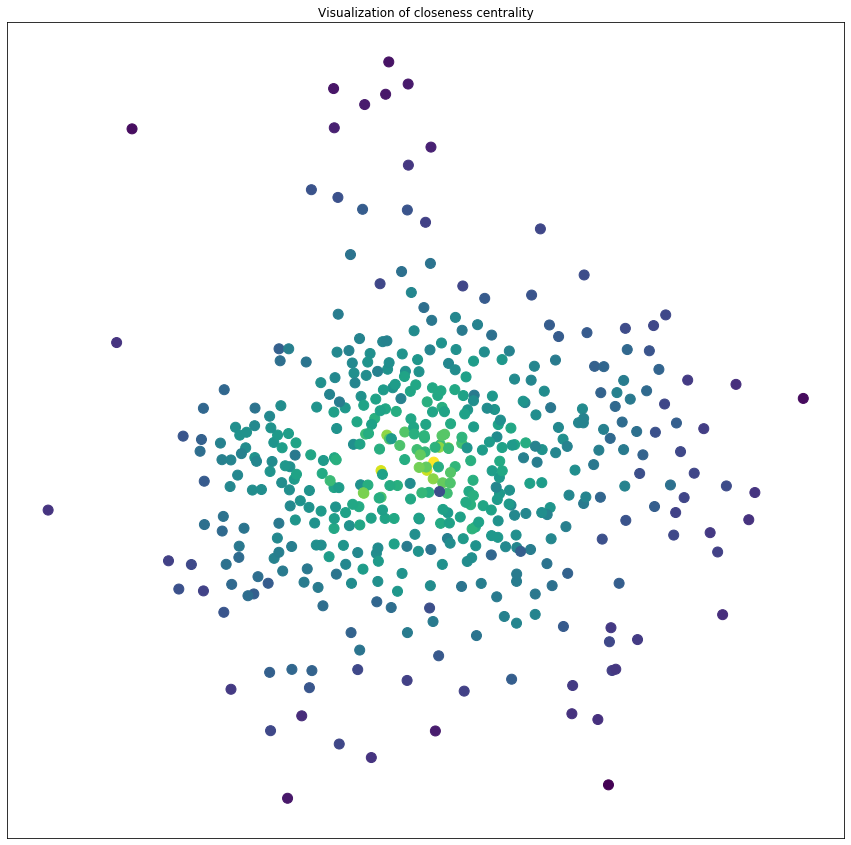

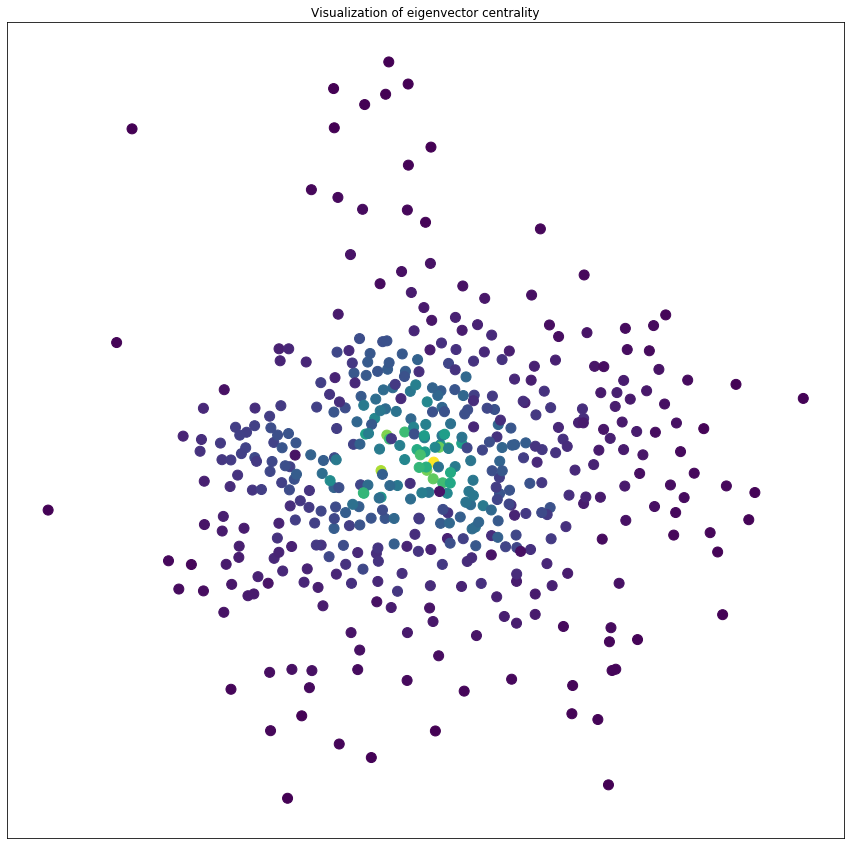

In [9]:
#plot using centrality

def centrality_attribute(centrality_path, user_user_graph, centrality_name, pos):
    f = open(centrality_path, "r")
    f1 = f.readlines()
    node_centrality_dict = {}
    for line in f1:
        node, centrality = line.strip('\n').split(' ')
        node, centrality = float(node), float(centrality)
        node_centrality_dict[node] = centrality

    nx.set_node_attributes(user_user_graph, node_centrality_dict , centrality_name)


    color_map = [user_user_graph.nodes[label][centrality_name] for label in user_user_graph.nodes()]

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,15))

    nx.nx_pylab.draw_networkx(user_user_graph, 
                              pos = pos,
                              arrowsize = 1,
                              with_labels = False,
                              node_size = 100,
                              node_color = color_map,
                             edge_color = '#FFFFFF'#get the color map from here https://htmlcolorcodes.com/ !!!
                             )
    #ax.set_facecolor("#00000F")
    plt.title('Visualization of {} centrality'.format(centrality_name))
    plt.show()
    return user_user_graph

#plot and save node attributes
user_user_graph = centrality_attribute("./centrality/degree.txt", user_user_graph, 'degree', pos)
user_user_graph = centrality_attribute("./centrality/betweenness.txt", user_user_graph, 'betweenness', pos)
user_user_graph = centrality_attribute("./centrality/closeness.txt", user_user_graph, 'closeness', pos)
user_user_graph = centrality_attribute("./centrality/eigenvector.txt", user_user_graph, 'eigenvector', pos)